In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [51]:
# Configs
plt.rcParams["figure.figsize"] = (21, 9)
PRODUCT = "COCONUTS"
SYMBOL = "COCONUTS"
start_day = 0
end_day = 3

In [52]:
def prices_files(round: int, start: int, end: int):
    return [f"../data/island-data-bottle-round-{round}/prices_round_{round}_day_{i}.csv" for i in range(start, end+1)]
def trades_files(round: int, start: int, end: int):
    return [f"../data/island-data-bottle-round-{round}/trades_round_{round}_day_{i}_nn.csv" for i in range(start, end+1)]

rd_1_price_files, rd_1_trade_files = prices_files(1, -2, -2), trades_files(1, -2, -2)
rd_2_price_files, rd_2_trade_files = prices_files(2, -1, 1), trades_files(2, -1, 1)

all_price_files = rd_1_price_files + rd_2_price_files
all_trade_files = rd_1_trade_files + rd_2_trade_files

In [53]:
def get_prices_df(product):
    prices_df = pd.concat((pd.read_csv(filename, sep=";", usecols=lambda x: x not in ["day", "profit_and_loss"], index_col=["timestamp"]) for filename in all_price_files), axis="index").query(f"product == '{product}'").reset_index(drop=True)
    prices_df.insert(0, "timestamp", prices_df.index * 100)
    prices_df.set_index("timestamp", inplace=True)
    return prices_df

def get_trades_df(symbol):
    trades_df = pd.concat((pd.read_csv(filename, sep=";", usecols=lambda x : x not in ["buyer", "seller", "currency"], index_col=["timestamp"]) for filename in all_trade_files)).query(f"symbol == '{symbol}'").reset_index(drop=True)
    trades_df.insert(0, "timestamp", trades_df.index)
    trades_df.set_index("timestamp", inplace=True)
    return trades_df

In [54]:
prices_df = get_prices_df(PRODUCT).fillna(0)
prices_df.insert(7, "bid_volume", prices_df["bid_volume_1"] + prices_df["bid_volume_2"] + prices_df["bid_volume_3"])
prices_df.insert(14, "ask_volume", - prices_df["ask_volume_1"] - prices_df["ask_volume_2"] - prices_df["ask_volume_3"])
prices_df["diff_volume"] = prices_df["bid_volume"] + prices_df["ask_volume"]
prices_df

,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,bid_volume,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,ask_volume,mid_price,diff_volume
timestamp,,,,,,,,,,,,,,,,,
0,COCONUTS,7999,162,0.0,0.0,0.0,0.0,162.0,8001,55,8002.0,107.0,0.0,0.0,-162.0,8000.0,0.0
100,COCONUTS,7998,187,0.0,0.0,0.0,0.0,187.0,8001,187,0.0,0.0,0.0,0.0,-187.0,7999.5,0.0
200,COCONUTS,7997,191,0.0,0.0,0.0,0.0,191.0,8000,191,0.0,0.0,0.0,0.0,-191.0,7998.5,0.0
300,COCONUTS,7998,187,0.0,0.0,0.0,0.0,187.0,8001,187,0.0,0.0,0.0,0.0,-187.0,7999.5,0.0
400,COCONUTS,7997,186,0.0,0.0,0.0,0.0,186.0,8000,186,0.0,0.0,0.0,0.0,-186.0,7998.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999500,COCONUTS,7923,162,0.0,0.0,0.0,0.0,162.0,7926,162,0.0,0.0,0.0,0.0,-162.0,7924.5,0.0
2999600,COCONUTS,7924,197,0.0,0.0,0.0,0.0,197.0,7926,197,0.0,0.0,0.0,0.0,-197.0,7925.0,0.0
2999700,COCONUTS,7923,54,7922.0,108.0,0.0,0.0,162.0,7925,162,0.0,0.0,0.0,0.0,-162.0,7924.0,0.0


In [55]:
def time_at(day_in_df: int):
    return day_in_df * 1000000

def prices_on_day(start: int, end: int):
    new_df = prices_df.loc[time_at(start) : time_at(end)].copy()
    return new_df

In [56]:
trades_df = get_trades_df(SYMBOL)
trades_df = trades_df[trades_df['price'] != 0]
trades_df

,symbol,price,quantity
timestamp,,,
0,COCONUTS,8000.0,30
1,COCONUTS,7997.0,10
2,COCONUTS,7996.0,40
3,COCONUTS,7997.0,9
4,COCONUTS,8004.0,10
...,...,...,...
1073,COCONUTS,7919.0,9
1074,COCONUTS,7927.0,10
1075,COCONUTS,7927.0,55


<Axes: xlabel='timestamp'>

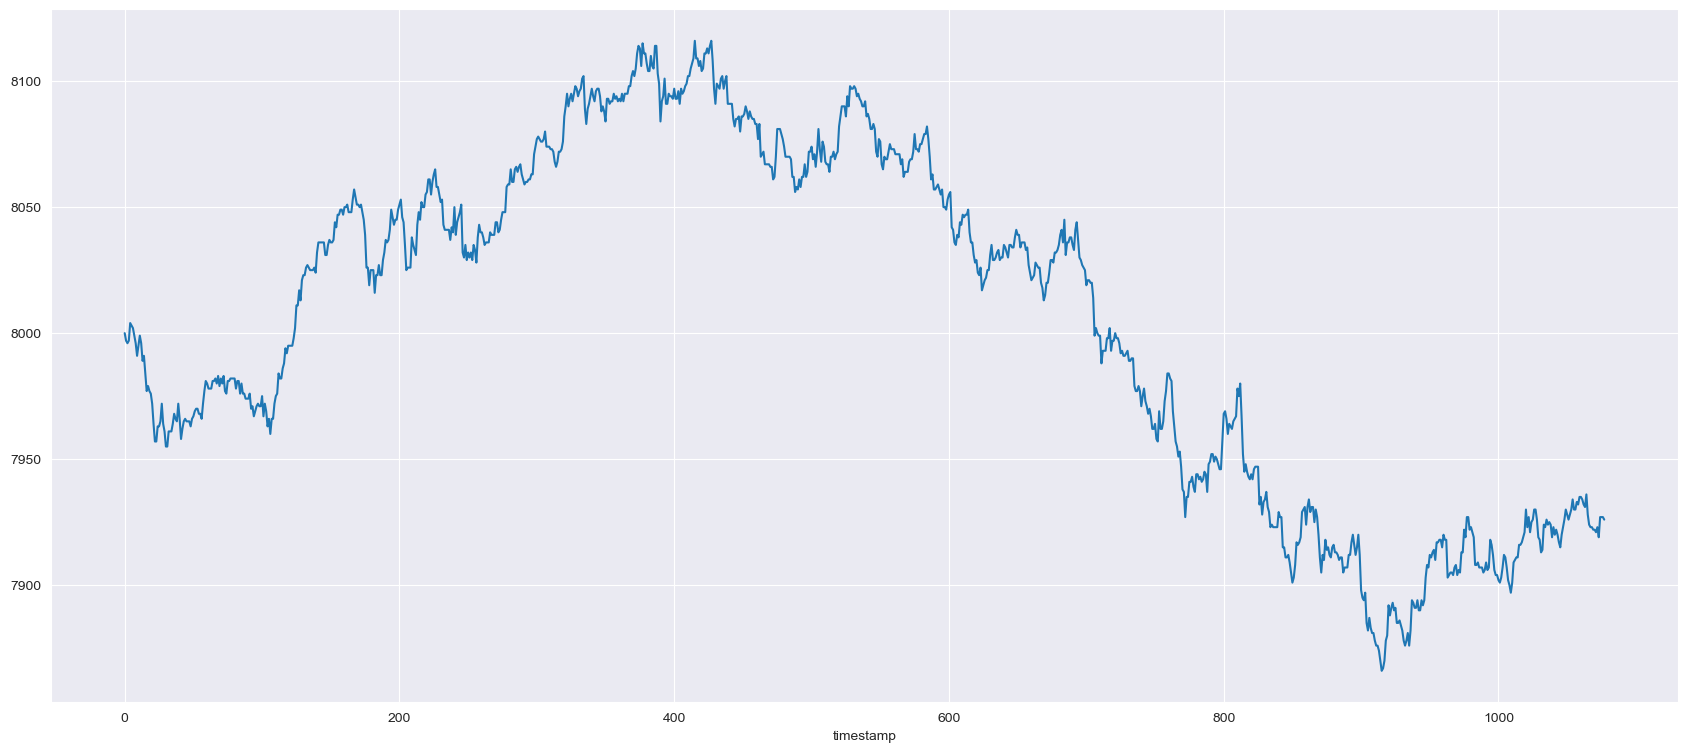

In [57]:
trades_df["price"].plot()

<Axes: xlabel='timestamp'>

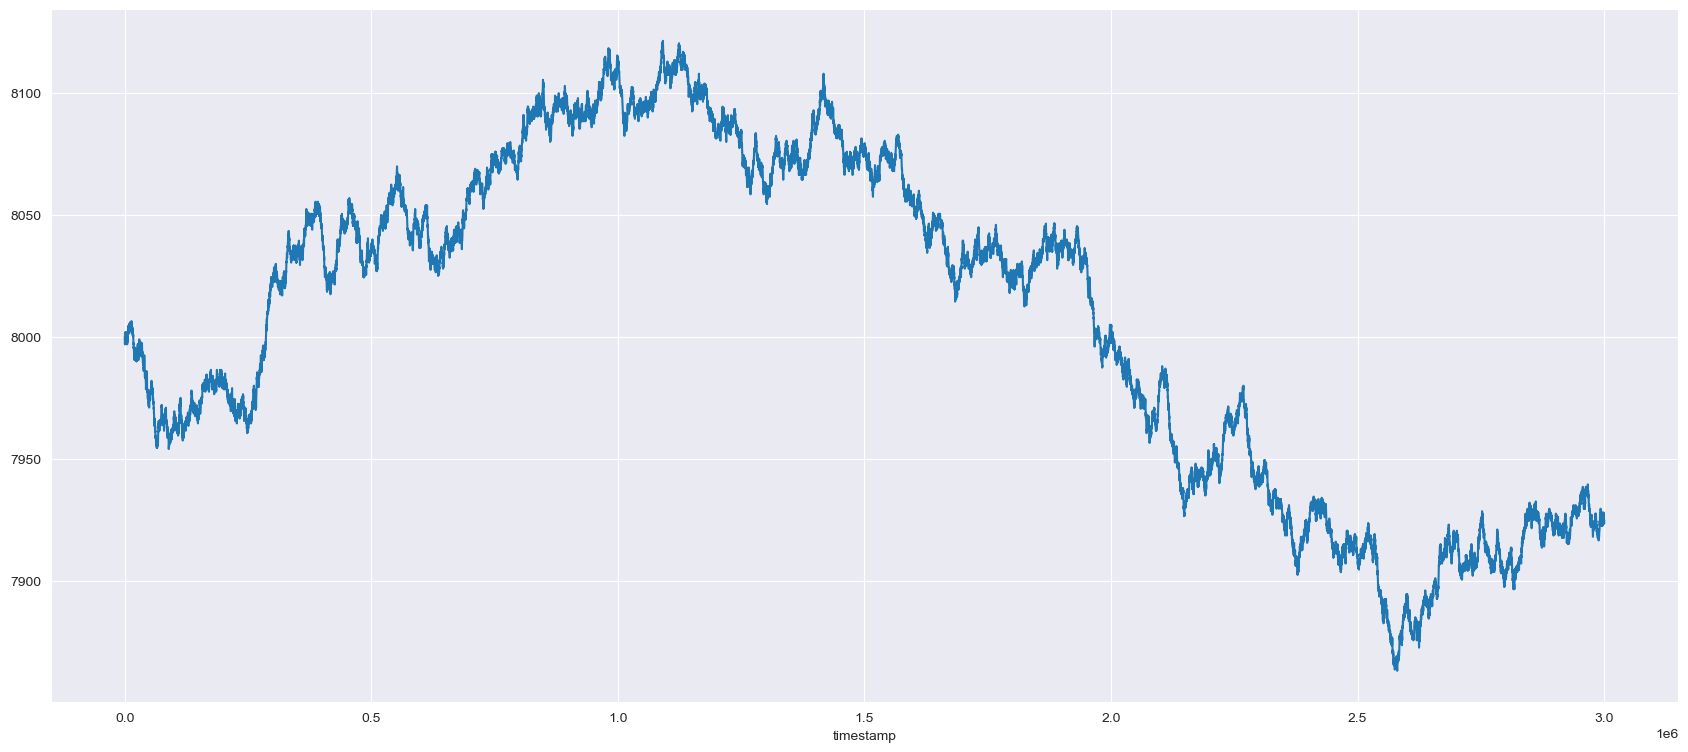

In [58]:
prices_df["mid_price"].plot()

<Axes: xlabel='timestamp'>

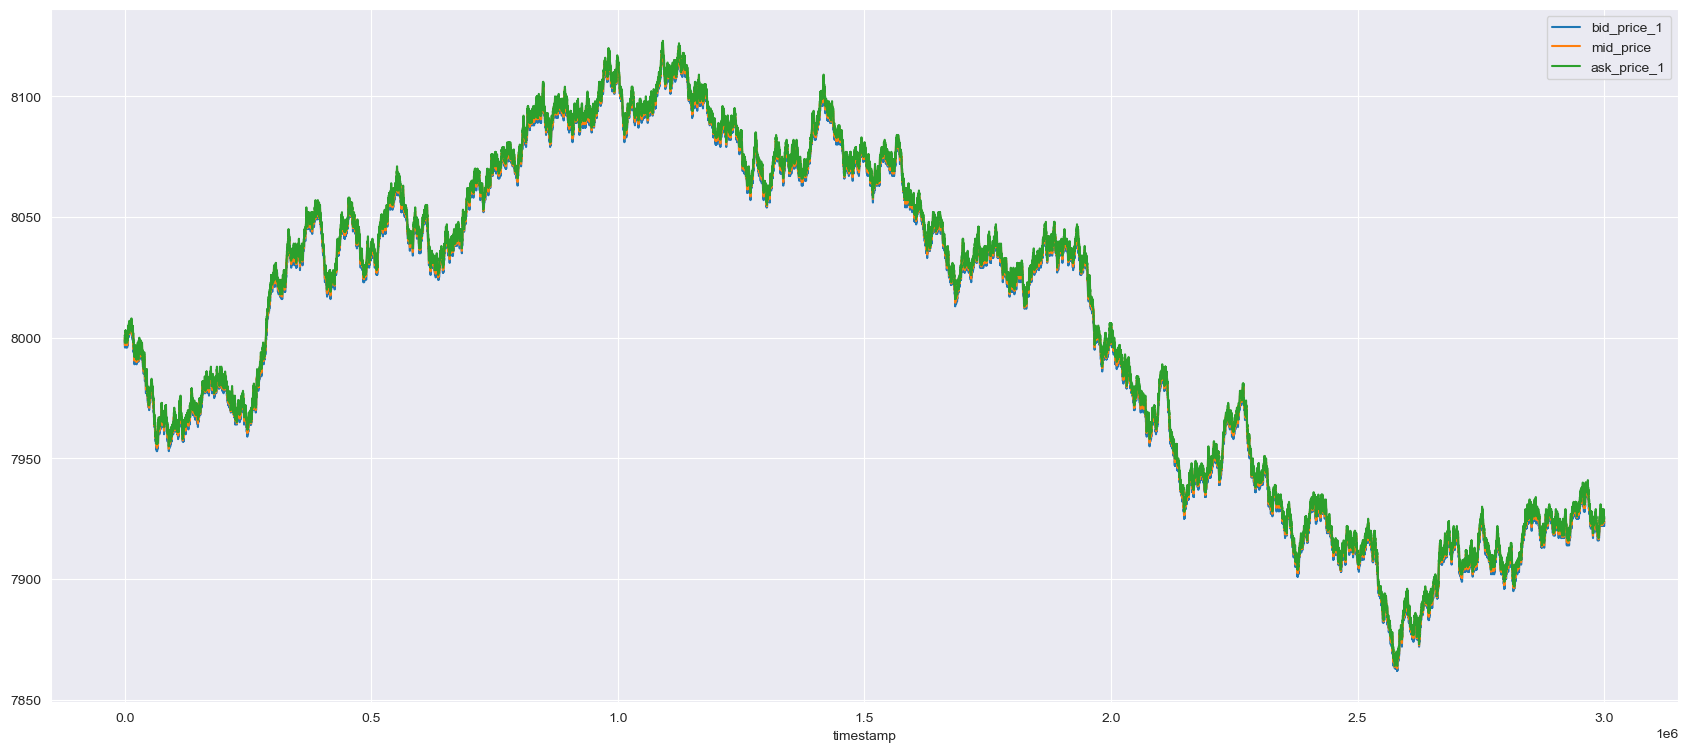

In [59]:
prices_df[["bid_price_1", "mid_price", "ask_price_1"]].plot()

<Axes: xlabel='timestamp'>

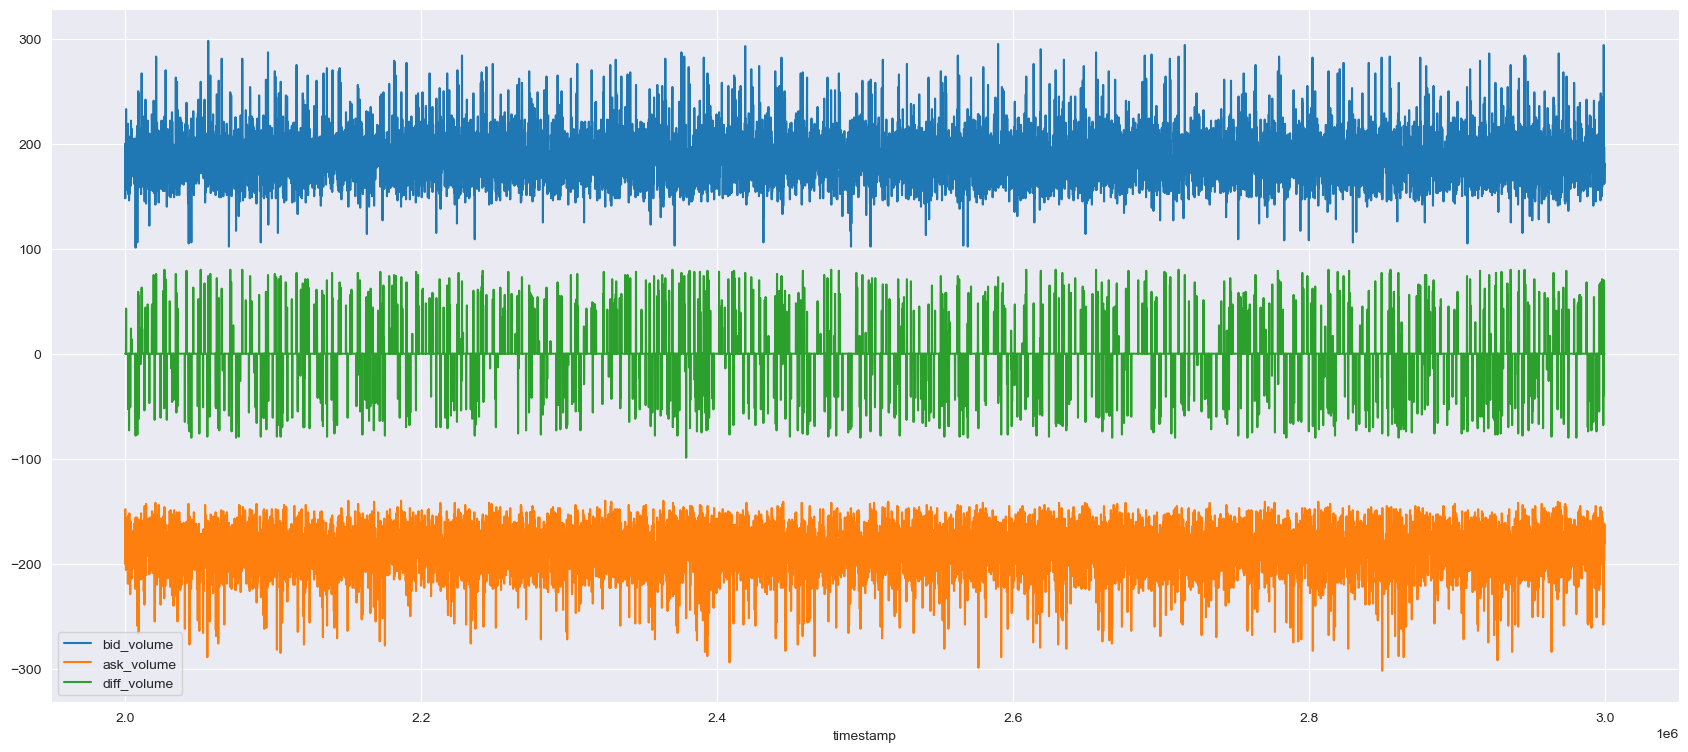

In [60]:
volumes = prices_on_day(2, 3)[["bid_volume", "ask_volume", "diff_volume"]]
volumes.plot()

In [61]:
volumes.describe()

,bid_volume,ask_volume,diff_volume
count,10000.000000,10000.000000,10000.000000
mean,187.180800,-187.299200,-0.118400
std,23.926148,22.446926,19.308844
min,101.000000,-302.000000,-99.000000
25%,171.000000,-201.000000,0.000000
50%,186.000000,-186.000000,0.000000
75%,201.000000,-172.000000,0.000000
max,298.000000,-140.000000,80.000000


In [62]:
volumes.shape

(10000, 3)

array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>],
      dtype=object)

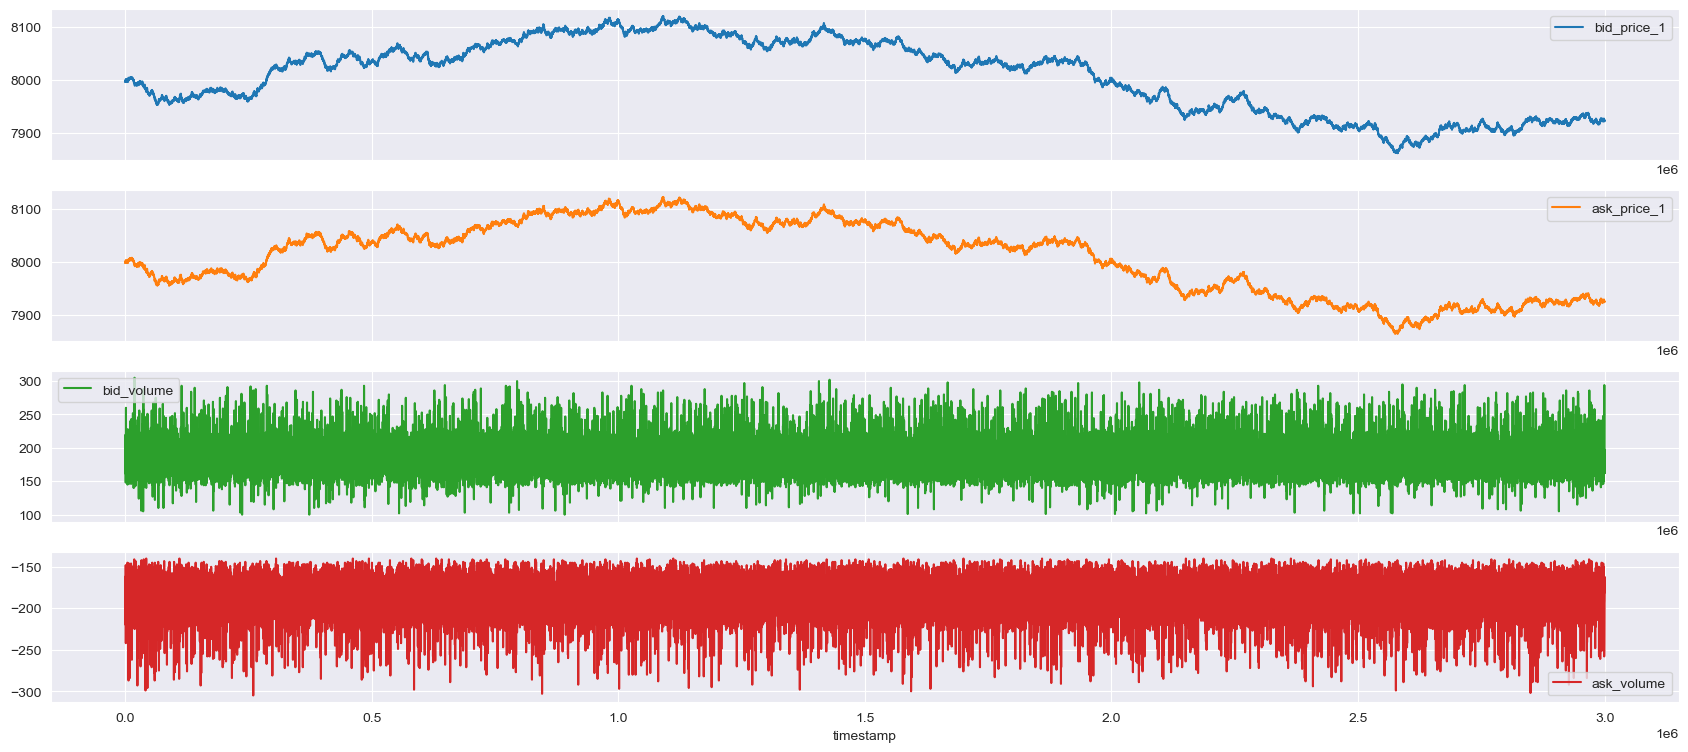

In [63]:
prices_df[["bid_price_1", "ask_price_1", "bid_volume", "ask_volume"]].plot(subplots=True)